# Princip minimální akce a Lagrange-Eulerovy rovnice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

from celluloid import Camera
from IPython.display import HTML
from base64 import b64encode

## Newtonovy zákony - opakování

[Newtonovy pohybové zákony](https://en.wikipedia.org/wiki/Newton's_laws_of_motion) jsou považovány za základy klasické mechaniky. Popisují vztah mezi pohybem tělesa a sílami, které na něj působí. Kůli jednoduchosti budeme uvažovat pohyb častice v 1D prostoru. Odvzozené vztahy jsou obecné je možné je jednoduše vyjádřit také ve 3D nebo pomocí zoběcněných souřadnic. 

\begin{equation}
\vec{r}(t) = \vec{x}(t) = x \vec{i}
\end{equation}

A vzhledem k její poloze jsou rychlost a zrychlení částice:

\begin{equation} \begin{array}{l}
\vec{v}(t) = \dfrac{\mathrm d \vec{x}(t)}{\mathrm d t} = \dfrac{d x(t)}{\mathrm d t}\vec{i}= \dot{\vec{x}}\\[2em]
\vec{a}(t) = \dfrac{\mathrm d \vec{x}(t)}{\mathrm d t} = \dfrac{\mathrm d^2 \vec{x}(t)}{\mathrm d t^2} = \ddot{\vec{x}}
\end{array} 
\end{equation}

Hybnost částice je definována jako:

\begin{equation}
\vec{p}(t) = m\vec{v}(t) = m \dot{\vec{x}}
\end{equation}

kde $m$ a $\dot{\vec{x}}$ jsou hmotnost a rychlost tělesa.

Druhý Newtonův zákon dává do souvislosti výslednou sílu působící na částici s rychlostí změny její hybnosti, a pokud je hmotnost konstantní:

\begin{equation} \begin{array}{l}
\vec{F}(t) = \dfrac{\mathrm d \vec{p}(t)}{\mathrm d t} = \dfrac{\mathrm d (m \vec{v}(t))}{\mathrm d t} =  \dfrac{\mathrm d (m \dot{\vec{x}})}{\mathrm d t}\\[2em]
\vec{F}(t) = m\vec{a}(t) = m \ddot{\vec{x}}
\end{array} \end{equation}
</span>

Z druhého Newtonova zákona, pokud je známa poloha částice v libovolném okamžiku, lze určit výslednou sílu, která na ni působí. Pokud poloha není známa, ale výsledná síla ano, polohu částice lze určit řešením následující obyčejné diferenciální rovnice druhého řádu:

\begin{equation}
\frac{\mathrm d^2 \vec{x}(t)}{\mathrm d t^2} = \frac{\vec{F}(t)}{m}
\end{equation}

Výše uvedená diferenciální rovnice je označována jako pohybová rovnice částice. Například systém $N$ částic bude vyžadovat $N$ rovnic k popisu v 1D a $3N$ rovnic ve 3D. Pohybová rovnice má obecné řešení

\begin{equation}
\vec{x}(t) = \int \left(\int\frac{\vec{F}(t)}{m} \mathrm{d}t\right) \mathrm{d}t
\end{equation}

což vyžaduje určení dvou konstant, počáteční polohy a rychlosti. Kůli jednoduchosti se na chvíli vzdáme vektorového zápisu a budeme popisovat polohu části pomocí parametru $x$, polohy na číselné ose. známenko určuje směr vektoru.

## Energie, síla, hybnost

Pro popis stavu částic můžeme využít také mechanickou energii, která je součtem kinetické a potenciálních energie. Kinetická energie, $E_k$ částice je dána vztahem:

\begin{equation}
E_k = \frac{1}{2}m v^2
\end{equation}

Což lze vyjádřit pomocí hybnosti jako:

\begin{equation}
E_k = \frac{1}{2m} p^2
\end{equation}

A pro danou souřadnici pohybu částice lze její hybnost získat z její kinetické energie:

\begin{equation}
\vec{p} = \frac{\partial E_k}{\partial \vec{v}}
\end{equation}


Potenciální energie $U$ je uložená energie částice a její formulace je závislá na síle působící na částici. Pro konzervativní sílu závislou pouze na poloze částice $x$ v 1D, například v důsledku gravitačního pole v blízkosti zemského povrchu nebo v důsledku lineární pružiny, lze sílu vyjádřit pomocí gradientu potenciální energie:

\begin{equation}
\vec{F} = -\nabla U(\vec{x}) = -\frac{\partial U}{\partial x}\vec{i}
\label{eq12}
\end{equation}

## Lagrangeova rovnice v kartézských souřadnicích

Pro jednoduchost si nejprve odvodme Lagrangeovu rovnici pro částici v kartézských souřadnicích a z druhého Newtonova zákona.

Protože chceme odvodit zákony pohybu založené na mechanické energii částice, můžeme vidět, že časová derivace výrazu pro hybnost jako funkce kinetické energie, se rovná síle působící na částici a sílu ve druhém Newtonově zákoně můžeme nahradit tímto výrazem:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial E_k}{\partial \dot x}\right) = m\ddot x
\label{eq13}
\end{equation}

Viděli jsme, že konzervativní sílu lze vyjádřit také pomocí potenciální energie částice; nahradíme-li pravou stranu výše uvedené rovnice tímto výrazem, máme:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial T}{\partial \dot x}\right) = -\frac{\partial U}{\partial x}
\label{eq14}
\end{equation}

S využitím skutečnosti, že:

\begin{equation}
\frac{\partial E_k}{\partial x} = 0 \quad a \quad \frac{\partial U}{\partial \dot x} = 0
\label{eq15}
\end{equation}

Můžeme napsat:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial (E_k-U)}{\partial \dot x}\right) - \frac{\partial (E_k-U)}{\partial x} = 0
\label{eq16}
\end{equation}

Definujeme Lagrangeovu funkce nebo Lagranžián $\mathcal{L}$ jako rozdílu mezi kinetickou a potenciální energií v systému:

\begin{equation}
\mathcal{L} = T - V
\label{eq17}
\end{equation}

Pro konzervativní sílu působící na částici máme Lagrangeovu rovnici v kartézských souřadnicích:

\begin{equation}
\frac{\mathrm d }{\mathrm d t}\left(\frac{\partial \mathcal{L}}{\partial \dot x}\right) - \frac{\partial \mathcal{L}}{\partial x} = 0
\label{eq18}
\end{equation}


## Pohyb jako optimalizace

Tento přístup začíná veličinou nazývanou akce. Pokud minimalizujete akci, můžete získat cestu nejmenší akce, která představuje cestu, kterou fyzický systém projde prostorem a časem. Obecně řečeno, fyzici k této minimalizaci používají analytické nástroje. Princip minimální akce je variační princip umožňující pro libovolný fyzikální systém předpovědět, jak budou vypadat jeho pohybové rovnice.
Laicky řečeno, je to způsob, jak ze všech myslitelných trajektorií systému vybrat tu, podél které je určitá charakteristika systému (například energie) minimální. Tato se skutečně realizuje. 

### Standardní přístup

Pro vrh vzhůru s počáteční rychlostí $v_0$ a počáteční výškou $y_0$ platí

$$y(t)=-\frac{1}{2}gt^2+v_0t+y_0$$

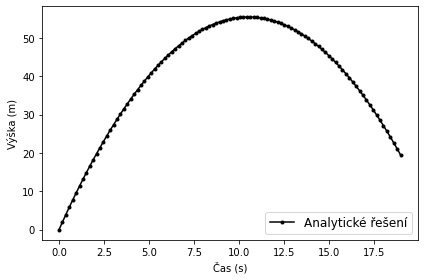

In [2]:
def falling_object_analytic(x0, x1, dt, g=1, steps=100):
    v0 = (x1 - x0) / dt
    t = np.linspace(0, steps, steps+1) * dt
    x = -.5*g*t**2 + v0*t + x0  # the equation of motion
    return t, x

x0, x1 = [0, 2]
dt = 0.19
t_ana, x_ana = falling_object_analytic(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytické řešení')
plt.xlabel('Čas (s)') ; plt.ylabel('Výška (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Numerický přístup

Ne všechny fyzikální problémy mají analytické řešení. Některé, jako dvojité kyvadlo nebo problém tří těles, jsou deterministické, ale chaotické. Jinými slovy, jejich dynamika je předvídatelná, ale nemůžeme znát jejich stav někdy v budoucnu, aniž bychom simulovali všechny zasahující stavy. Ty můžeme řešit numerickou integrací. U těla v gravitačním poli by numerický přístup vypadal takto:

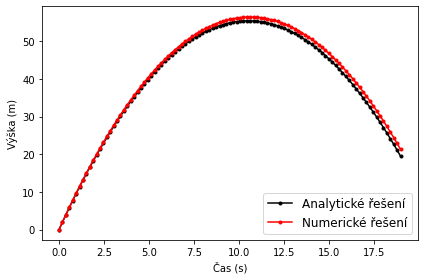

In [3]:
def falling_object_numerical(x0, x1, dt, g=1, steps=100):
    xs = [x0, x1]
    ts = [0, dt]
    v = (x1 - x0) / dt
    x = xs[-1]
    for i in range(steps-1):
        v += -g*dt
        x += v*dt
        xs.append(x)
        ts.append(ts[-1]+dt)
    return np.asarray(ts), np.asarray(xs)

t_num, x_num = falling_object_numerical(x0, x1, dt)

plt.figure()
plt.plot(t_ana, x_ana, 'k.-', label='Analytické řešení')
plt.plot(t_num, x_num, 'r.-', label='Numerické řešení')
plt.xlabel('Čas (s)') ; plt.ylabel('Výška (m)') ; plt.legend(fontsize=12)
plt.tight_layout() ; plt.show()

### Minimalizace akce

**Lagrangeova metoda.** Přístupy, které jsme právě probrali, dávají intuitivní smysl. Proto je učíme v úvodních hodinách fyziky. Existuje však zcela jiný způsob pohledu na dynamiku, který se nazývá Lagrangeova metoda. Lagrangeova metoda lépe popisuje realitu, protože dokáže vytvářet pohybové rovnice pro jakýkoli fyzikální systém. Lagrangiány figurují ve všech čtyřech odvětvích fyziky: klasické mechanice, elektřině a magnetismu, termodynamice a kvantové mechanice. Bez Lagrangianovy metody by fyzici tyto nesourodé obory jen těžko sjednocovali. Ale se [standardním model Lagrangiánu](https://www.symmetrymagazine.org/article/the-deconstructed-standard-model-equation) dokážou přesně to.

**Jak to funguje.** Lagrangiánská metoda začíná zvážením všech cest, kterými by se fyzický systém mohl vydat z počátečního stavu $\bf x(t_0)$ do konečného stavu $\bf x(t_1)$. Pak poskytuje jednoduché pravidlo pro výběr cesty $\hat{\bf x}$, kterou příroda skutečně provede: akce $S$, definovaná v rovnici níže, musí mít nad touto cestou stacionární hodnotu (maximum nebo minimum). Zde $T$ a $V$ jsou funkce kinetické a potenciální energie pro systém v jakémkoli daném čase $t$ v $[t_0,t_1]$.
$$
\begin{aligned}
S &:= \int_{t_0}^{t_1} \mathcal L({\bf x}, ~ \dot{\bf x}, ~ t) ~ dt
\quad \textrm{where}\quad \mathcal L = T - V \\
\quad \hat{\bf x} &~~ \textrm{má vlastnost} \quad \frac{d}{dt} \left( \frac{\partial \mathcal L}{\partial \dot{\hat{x}}(t)} \right) = \frac{\partial \mathcal L}{\partial \hat{x}(t)} \quad \textrm{for} \quad t \in [t_0,t_1]
\end{aligned}
$$
**Nalezení $\hat{\bf x}$ pomocí Euler-Lagrange (co lidé obvykle dělají).** Když je $S$ stacionární, můžeme ukázat, že Euler-Lagrangeova rovnice (druhý řádek výše uvedených rovnic) platí v intervalu $[t_0,t_1]$ (Morin, 2008). Toto pozorování je cenné, protože nám umožňuje řešit pro $\hat{\bf x}$: nejprve aplikujeme Euler-Lagrangeovu rovnici na Lagrangian $L$ a odvodíme systém parciálních diferenciálních rovnic. Potom tyto rovnice integrujeme a získáme $\hat{\bf x}$. Důležité je, že tento přístup funguje pro všechny problémy zahrnující klasickou mechaniku, elektrodynamiku, termodynamiku a teorii relativity. Poskytuje ucelený teoretický rámec pro studium klasické fyziky jako celku.

**Nalezení $\hat{\bf x}$ s minimalizací akce (co budeme dělat).** Přímější přístup k nalezení $\hat{\bf x}$ začíná zjištěním, že cesty stacionární akce jsou téměř vždy také cestami nejménší akce (Morin 2008). Bez velké ztráty obecnosti tedy můžeme vyměnit Euler-Lagrangeovu rovnici za jednoduchý cíl minimalizace uvedený ve třetí části rovnice níže. Mezitím, jak je ukázáno v první části rovnice níže, můžeme předefinovat $S$ jako diskrétní součet přes $N$ rovnoměrně rozložených časových řezů:
$$
S := \sum_{i=0}^{N} L({\bf x}, ~ \dot{{\bf x}}, ~ t_i) \Delta t \quad \textrm{where} \quad \dot{{\bf x}}(t_i) := \frac{ {\bf x}(t_{i+1}) - {\bf x}(t_{i})}{\Delta t} \quad \textrm{and} \quad \hat{\bf x} := \underset{\bf x}{\textrm{argmin}} ~ S(\bf x)
$$
Zůstává jeden problém: po diskretizaci $\hat{ \bf x}$ již nemůžeme vzít jeho derivaci k získání přesné hodnoty pro $\dot{ \bf x}(t_i)$. Místo toho musíme použít aproximaci konečných rozdílů uvedenou v druhé části rovnice výše. Tato aproximace samozřejmě nebude možná pro úplně poslední $\dot{ \bf x}$ v součtu, protože $\dot{ \bf x}_{N+1}$ neexistuje. Pro tuto hodnotu budeme předpokládat, že pro velké $N$ je změna rychlosti v intervalu $\Delta t$ malá a nechť $\dot{ \bf x}_N = \dot{ \bf x}_{N-1}$. Po provedení této poslední aproximace nyní můžeme vypočítat gradient $\frac{\partial S}{\partial {\bf x}}$ numericky a použít jej k minimalizaci $S$. To lze provést pomocí PyTorch (Paszke et al, 2019).



In [4]:
def lagrangian_freebody(x, xdot, m=1, g=1):
    T = .5*m*xdot**2
    V = m*g*x
    return T, V
  
def action(x, dt):
    xdot = (x[1:] - x[:-1]) / dt
    xdot = torch.cat([xdot, xdot[-1:]], axis=0)
    T, V = lagrangian_freebody(x, xdot)
    return T.sum()-V.sum()

Nyní hledejme bod stacionární bod. Technicky vzato to může být minimum NEBO inflexní bod. Zde budeme hledat pouze minimum:

In [5]:
import torch
def get_path_between(x, steps=1000, step_size=1e-1, dt=1, num_prints=8, num_stashes=80):
    t = np.linspace(0, len(x)-1, len(x)) * dt
    print_on = np.linspace(0,int(np.sqrt(steps)),num_prints).astype(np.int32)**2 # print more often early in loop
    stash_on = np.linspace(0,int(np.sqrt(steps)),num_stashes).astype(np.int32)**2
    xs = []
    for i in range(steps):
        grad_x = torch.autograd.grad(action(x, dt), x)[0]
        grad_x[[0,-1]] *= 0  # fix first and last coordinates by zeroing their grads
        x.data -= grad_x * step_size

        if i in print_on:
            print('step={:04d}, S={:.4e} J*s'.format(i, action(x, dt).item()))
        if i in stash_on:
            xs.append(x.clone().data.numpy())
    return t, x, np.stack(xs)

Nyní si to všechno spojíme dohromady. Můžeme inicializovat dráhu naší padající částice jako libovolnou náhodnou dráhu prostorem. V níže uvedeném kódu jsme zvolili dráhu, na které částice náhodně poskakuje kolem x=0 až do času t=19 sekund, kdy vyskočí do konečného stavu x = $x_num[-1]$ = 21,3 metru. Tato dráha má velkou akční sílu S = 5425 J-s. Při optimalizaci se tato hodnota plynule snižuje, až se dostaneme na parabolický oblouk s akčním zásahem S = -2500 Js.

step=0000, S=4.6903e+03 J*s
step=0400, S=-4.4979e+02 J*s


step=1600, S=-1.4840e+03 J*s


step=3600, S=-2.1644e+03 J*s


step=6400, S=-2.4284e+03 J*s


step=10000, S=-2.4900e+03 J*s


step=14400, S=-2.4989e+03 J*s


step=19881, S=-2.4998e+03 J*s


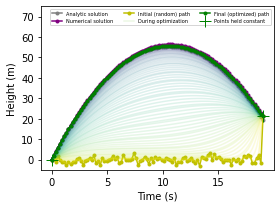

In [6]:
dt = 0.19
x0 = 1.5*torch.randn(len(x_num), requires_grad=True)  # a random path through space
x0[0].data *= 0.0 ; x0[-1].data *= 0.0  # set first and last points to zero
x0[-1].data += x_num[-1]  # set last point to be the end height of the numerical solution

t, x, xs_ncf = get_path_between(x0.clone(), steps=20000, step_size=1e-2, dt=dt)

plt.figure(figsize=[4,3])
# plt.title('Minimizing the Action')
plt.plot(t_ana, x_ana, '.-', color='gray', label='Analytic solution')
plt.plot(t_num, x_num, '.-', color='purple', label='Numerical solution')

plt.plot(t, x0.detach().numpy(), 'y.-', label='Initial (random) path')
for i, xi in enumerate(xs_ncf):
    label = 'During optimization' if i==15 else None
    plt.plot(t, xi, alpha=0.15, color=plt.cm.viridis( 1-i/(len(xs_ncf)-1) ), label=label)
plt.plot(t, x.detach().numpy(), 'g.-', label='Final (optimized) path')
plt.plot(t[[0,-1]], x0.data[[0,-1]], 'g+', markersize=12, label='Points held constant')

plt.ylim(-5, 75)
plt.xlabel('Time (s)') ; plt.ylabel('Height (m)') ; plt.legend(fontsize=5, ncol=3)
plt.tight_layout()  ; plt.show()

In [7]:
def make_video(t, xs, path, interval=60, color='black', mode='ncf', **kwargs): # xs: [time, N, 2]
    fig = plt.gcf() ; fig.set_dpi(200) ; fig.set_size_inches(3, 3)
    camera = Camera(fig)
    for i in range(len(xs) if type(xs) is list else xs.shape[0]):
        if mode == 'ncf':
            for j, xi in enumerate(xs[:i]):
                plt.plot(t, xi, alpha=0.15, color=plt.cm.viridis( 1-j/(len(xs)-1) ), label=label)
            plt.plot(t, xs[0], '.-', color=plt.cm.viridis(0.9))
        plt.plot(t[[0,-1]], xs[-1][[0,-1]], '+', color=color, markersize=16)
        plt.plot(t[:len(xs[i])], xs[i], '.-', color=color)
        plt.xlim(np.min(t)-1, np.max(t)+1) ; plt.ylim(-5, 75)
        plt.xticks([], []); plt.yticks([], []) ; plt.xlabel('Time (s)') ; plt.ylabel('Height (m)')
        camera.snap()
    anim = camera.animate(blit=True, interval=interval, **kwargs)
    anim.save(path) ; plt.close()

In [8]:
xs_ncf_ = np.concatenate([xs_ncf[:1]]*20+[xs_ncf]+[xs_ncf[-1:]]*20 )
make_video(t, xs_ncf_, path='static/tutorial_ncf.mp4', color='green', interval=80)

mp4 = open('static/tutorial_ncf.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=300 controls><source src="{}" type="video/mp4"></video>'.format(data_url))